# Predicting Heart Disease using Machine Learning

## 1. Problem Definition
Using binary classification to identify if a person have heart disease or not

## 2. Data
Dataset originaly from UCI Machine Learning repository, 
https://archive.ics.uci.edu/ml/datasets/heart+Disease

But we will be downlading the formatted version from kaggle,
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

## 4. Features
Features are different parts of our dataset.

**Heart Disease Data Dictionary**

a. age: Displays the age of the individual.

b. sex: Displays the gender of the individual using the following format : 
    1 = male 
    0 = female

c. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
    0 = typical angina 
    1 = atypical angina 
    2 = non — anginal pain 
    3 = asymptotic

d. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

e. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

f. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

g. restecg- Resting ECG : displays resting electrocardiographic results 
    0 = normal 
    1 = having ST-T wave abnormality 
    2 = left ventricular hyperthrophy

h. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

i. exang- Exercise induced angina : 1 = yes 0 = no

j. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

k. slope- Slope of the peak exercise ST segment : 
    0 = upsloping: better heart rate with excercise (uncommon) 
    1 = flat: minimal change (typical healthy heart) 
    2 = downsloping: signs of unhealthy heart

l. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

m. thal : Displays the thalassemia : 
    1,3 = normal 6 = fixed defect 
    7 = reversible defect: no proper blood movement when excercising

n. target : Displays whether the individual is suffering from heart disease or not : 
    1 = yes 
    0 = no

5. Modelling
6. Experimentation

## Preparing Tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration [EDA]

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?
   

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

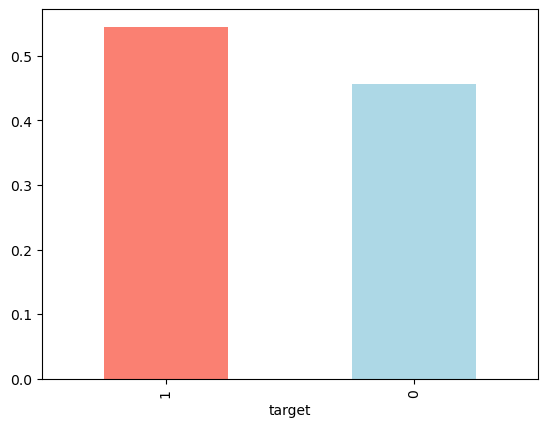

In [7]:
df.target.value_counts(normalize=True).plot(kind="bar", color=["salmon", "lightblue"])

### Data Info
check missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Gender

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

207 males and 96 females

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

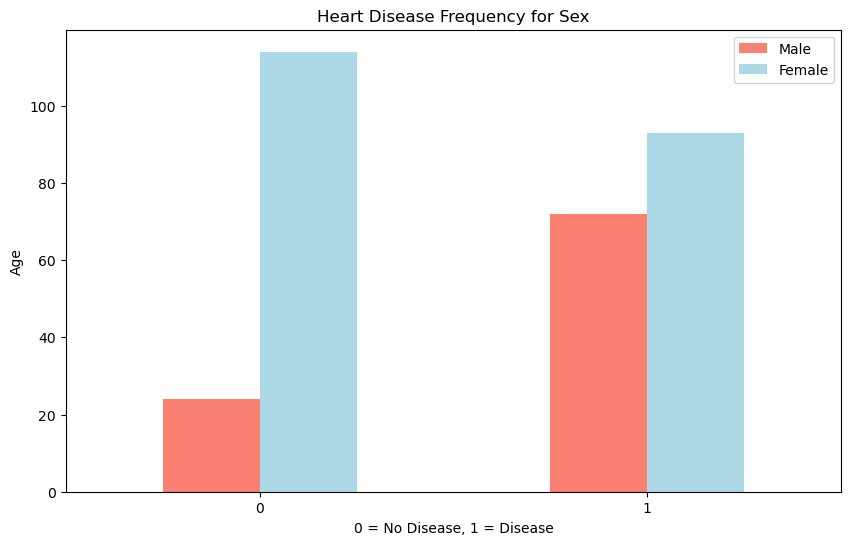

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
         figsize=(10, 6),
         color=["salmon", "lightblue"]
    )
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Age")
plt.legend(["Male", "Female"])
plt.xticks(rotation=0)


### Age vs Max Heart rate for Heart Disease

Text(0, 0.5, 'Max Heart Rate')

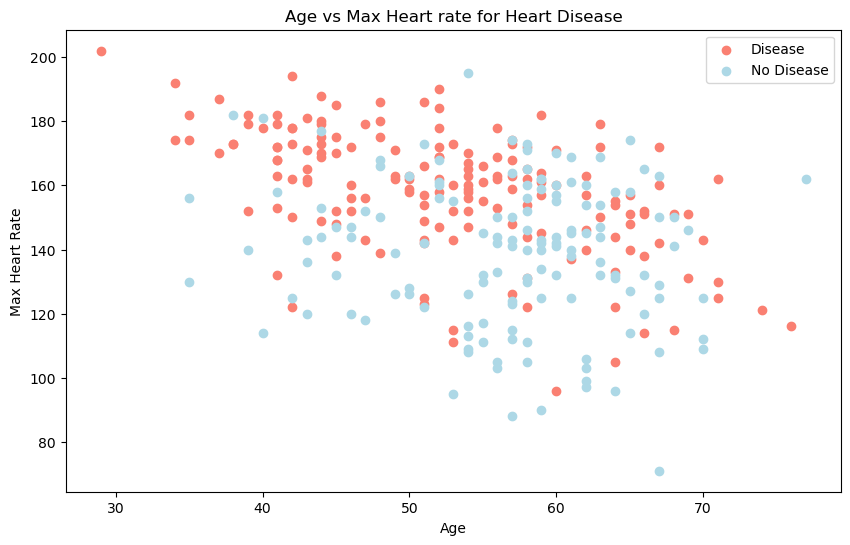

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c="lightblue")
plt.title("Age vs Max Heart rate for Heart Disease")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate")

### Age Distribution

<Axes: ylabel='Frequency'>

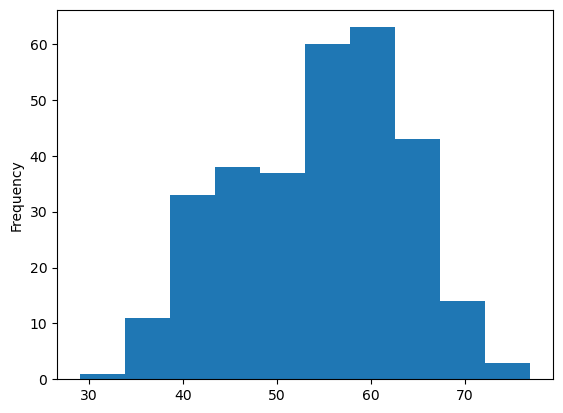

In [14]:
df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type


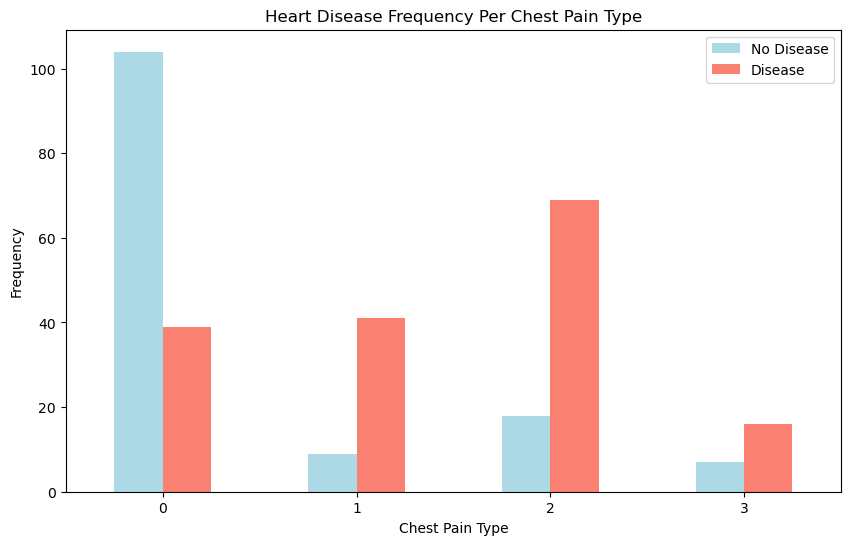

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10, 6),
                                   color=["lightblue", "salmon"]
                                  )
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Correlation between independent variables

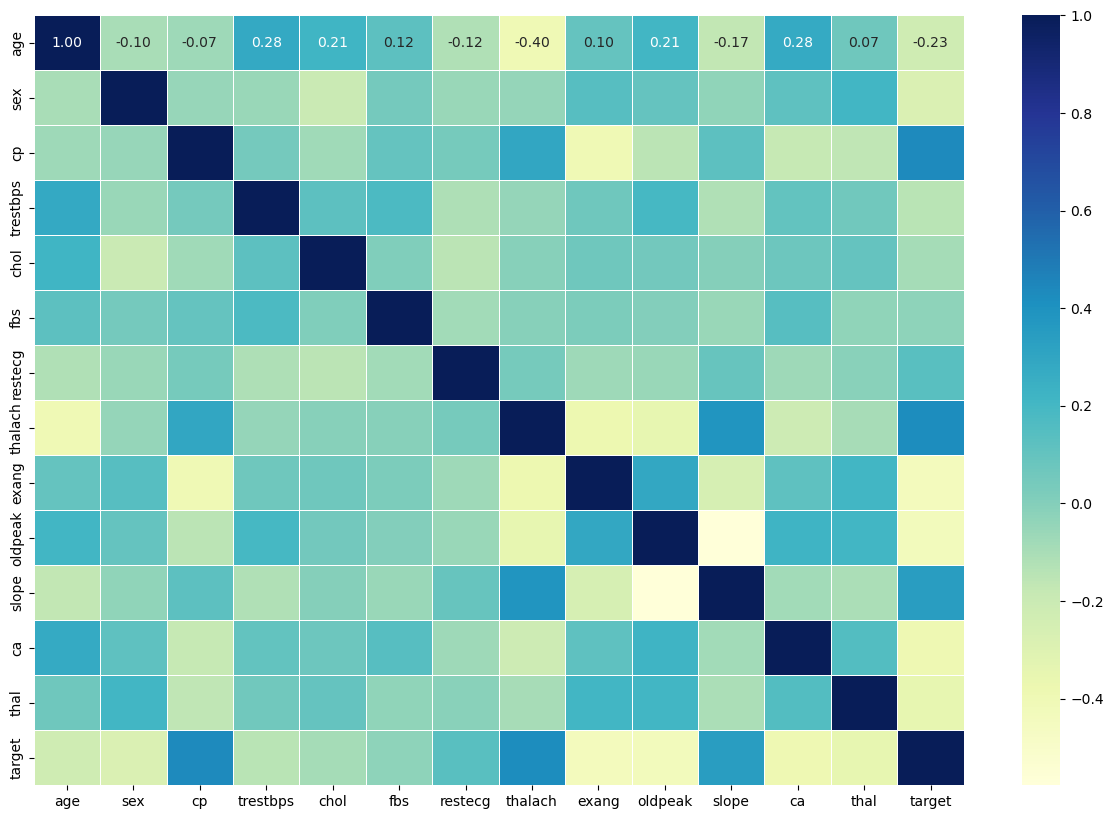

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

----
## Modelling

In [17]:
X = df.drop("target", axis=1)
y = df.target.values

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model choices

In [18]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/MarkErnestMatute/Documents/data-science/e-to-e-heart-disease/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

<Axes: >

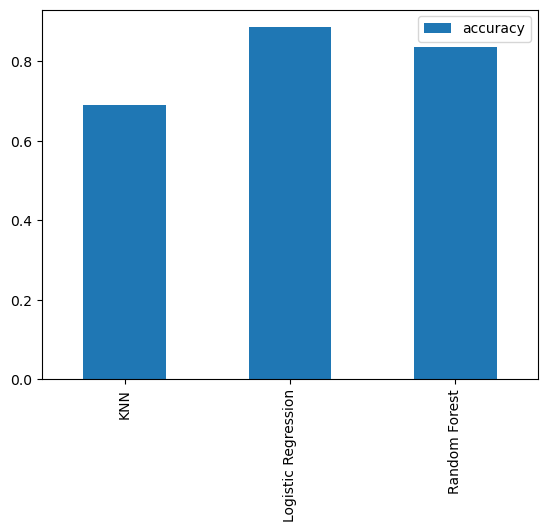

In [19]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

----
## Model tuning

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

Maximum KNN score on the test data: 75.41%


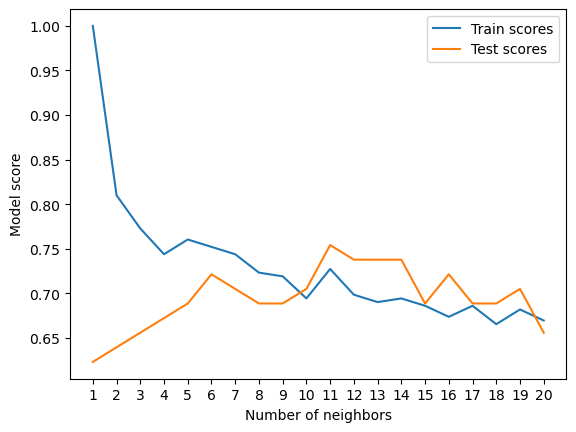

In [20]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Tuning models with RandomizedSearchCV

#### Logistic Regression

In [21]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [22]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Random Forest Classifier

In [23]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [24]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [25]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning a model with GridSearchCV

In [26]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [28]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

----
## Evaluating a classification model, beyond accuracy


In [30]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### ROC Curve and AUC Scores


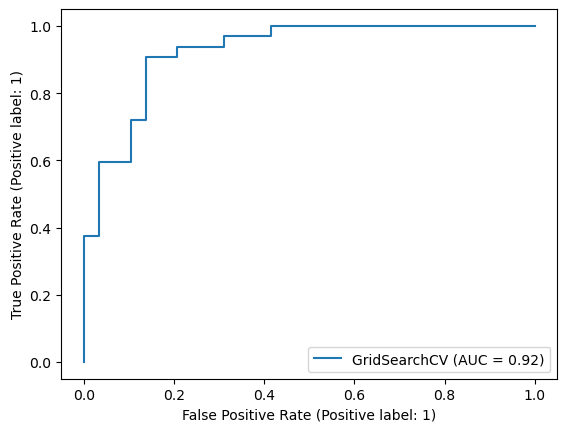

In [31]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

### Confusion Matrix

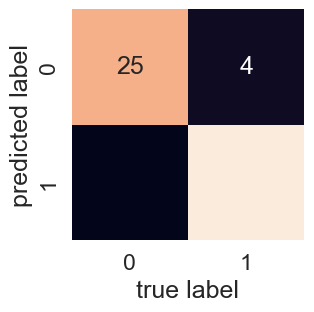

In [36]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification Report

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [42]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [43]:
cv_prec = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [44]:
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [45]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'CV Metrics'}>

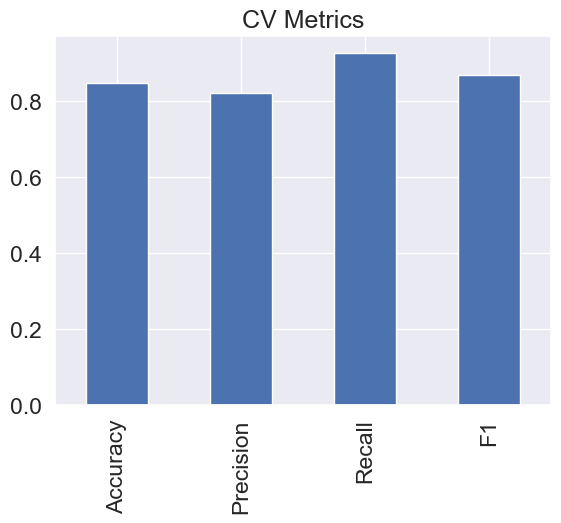

In [47]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prec,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="CV Metrics", legend=False
                    )

### Feature Importance

In [48]:
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [51]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

<Axes: title={'center': 'Feature Importance'}>

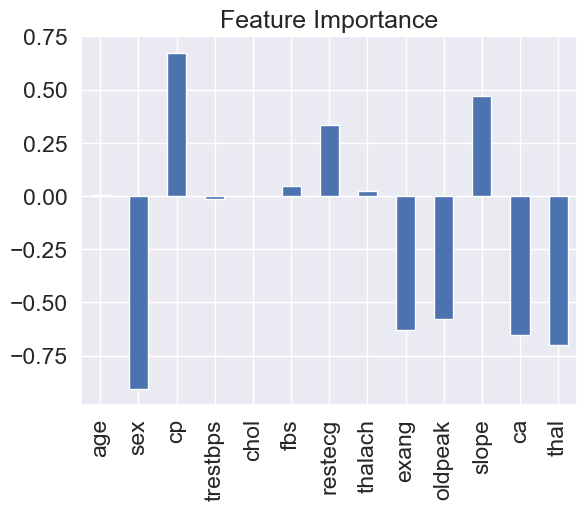

In [52]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title = "Feature Importance", legend=False)

In [53]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [54]:
pd.crosstab(df["slope"], df["target"])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107
